In [1]:
DATA_ROOT = "/home/kwatchar3/data/musdb18hq/dac/train"

In [2]:
import os
import glob

from collections import defaultdict

import numpy as np

from tqdm import tqdm

In [3]:
VALIDATION_FILES = [
        "Actions - One Minute Smile",
        "Clara Berry And Wooldog - Waltz For My Victims",
        "Johnny Lokke - Promises & Lies",
        "Patrick Talbot - A Reason To Leave",
        "Triviul - Angelsaint",
        "Alexander Ross - Goodbye Bolero",
        "Fergessen - Nos Palpitants",
        "Leaf - Summerghost",
        "Skelpolu - Human Mistakes",
        "Young Griffo - Pennies",
        "ANiMAL - Rockshow",
        "James May - On The Line",
        "Meaxic - Take A Step",
        "Traffic Experiment - Sirens",
    ]

In [4]:
z_mix = []
z_bass = []
z_vox = []
z_drums = []

for v in tqdm(VALIDATION_FILES):
    path = os.path.join(DATA_ROOT, v)

    # print(os.listdir(path))

    z_mix.append(np.load(os.path.join(path, "mixture.npy"), mmap_mode="r")[..., ::16])
    z_bass.append(np.load(os.path.join(path, "bass.npy"), mmap_mode="r")[..., ::16])
    z_vox.append(np.load(os.path.join(path, "vocals.npy"), mmap_mode="r")[..., ::16])
    z_drums.append(np.load(os.path.join(path, "drums.npy"), mmap_mode="r")[..., ::16])
    
z_mix = np.concatenate(z_mix, -1)
z_bass = np.concatenate(z_bass, -1)
z_vox = np.concatenate(z_vox, -1)
z_drums = np.concatenate(z_drums, -1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 212.13it/s]


In [5]:
print([z.shape for z in z_mix])

[(1024, 21611), (1024, 21611)]


In [6]:
from sklearn import manifold as skm
from sklearn import decomposition as skd

In [7]:
z_ = np.concatenate([
    z_mix[0], z_bass[0], z_vox[0], z_drums[0]
], axis=-1).T

c = np.tile(np.array(["M", "B", "V", "D"])[:, None], (1, z_mix[0].shape[-1])).flatten()

In [8]:
z_.shape, c.shape

((86444, 1024), (86444,))

In [14]:
y = skm.TSNE(2, verbose=2).fit_transform(z_)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 86444 samples in 0.129s...
[t-SNE] Computed neighbors for 86444 samples in 45.626s...
[t-SNE] Computed conditional probabilities for sample 1000 / 86444
[t-SNE] Computed conditional probabilities for sample 2000 / 86444
[t-SNE] Computed conditional probabilities for sample 3000 / 86444
[t-SNE] Computed conditional probabilities for sample 4000 / 86444
[t-SNE] Computed conditional probabilities for sample 5000 / 86444
[t-SNE] Computed conditional probabilities for sample 6000 / 86444
[t-SNE] Computed conditional probabilities for sample 7000 / 86444
[t-SNE] Computed conditional probabilities for sample 8000 / 86444
[t-SNE] Computed conditional probabilities for sample 9000 / 86444
[t-SNE] Computed conditional probabilities for sample 10000 / 86444
[t-SNE] Computed conditional probabilities for sample 11000 / 86444
[t-SNE] Computed conditional probabilities for sample 12000 / 86444
[t-SNE] Computed conditional probabilities for sa

In [10]:
from matplotlib import pyplot as plt

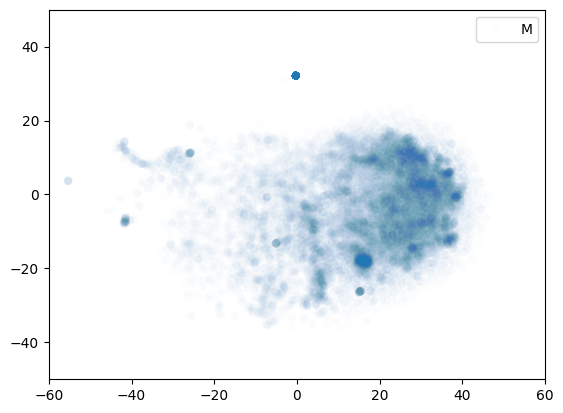

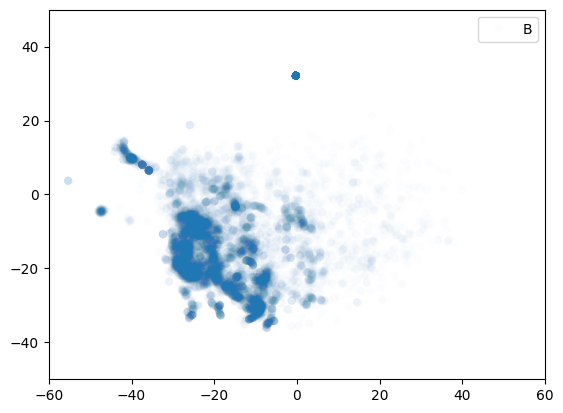

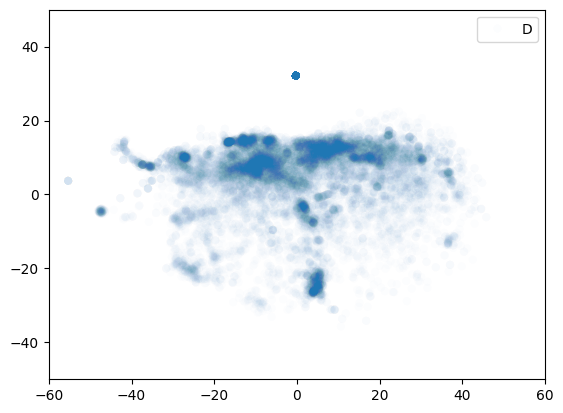

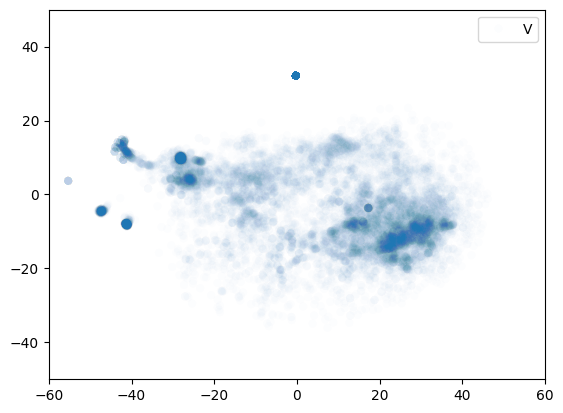

In [24]:
import seaborn as sns




for s in ["M", "B", "D", "V"]:
    cfilt = c == s
    ax = sns.scatterplot(x=y[cfilt, 0], y=y[cfilt, i], hue=c[cfilt], palette="tab10", edgecolor="none", alpha=0.01)
    ax.set(xlim=[-60, 60], ylim=[-50, 50])
    plt.show()